In [2]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.0


In [3]:
def plot_variant_hist(x, f, bins=30, xlim=100, neglim=0):
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_xlim(neglim, xlim)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

## FN 30

In [5]:
file = "/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/FN30cat/Variant_Recalibrator/FN30CAT_30.vcf"

In [ ]:
#allel.vcf_to_hdf5(file,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/FN30cat/Variant_Recalibrator/FN30CAT_30.h5',
                  fields='*',
                  overwrite=True)

In [6]:
callset = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/FN30cat/Variant_Recalibrator/FN30CAT_30.h5', mode='r')

In [7]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'QUAL', 'DP', 'MQ', 'QD', 'AC', 'FS', 'ReadPosRankSum', 'MQRankSum'])

In [16]:
np.percentile(callset['calldata/DP'], 7)

2.0

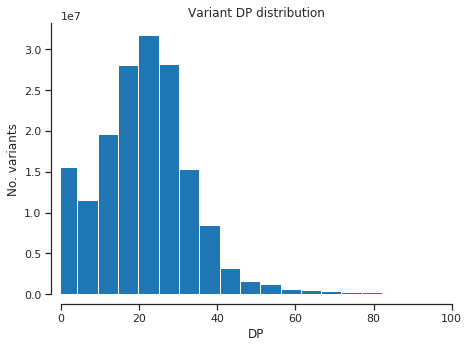

In [44]:
plot_variant_hist(callset['calldata/DP'][:,:].flatten(), 'DP', bins=1500)

In [9]:
np.percentile(variants['QUAL'][:], 5)

45.33000183105469

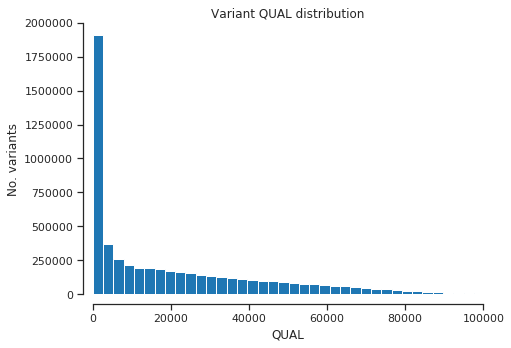

In [38]:
plot_variant_hist(variants['QUAL'][:], 'QUAL', bins=10000, xlim=100000)

In [29]:
QD = variants['QD'][:]
cleanQD = QD[np.isfinite(QD)]
np.percentile(cleanQD, 10)

1.9299999475479126

/home/morrellp/wyant008/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/morrellp/wyant008/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


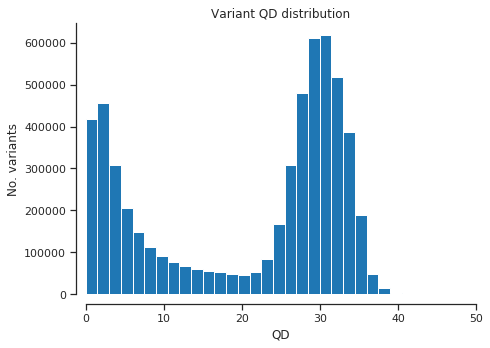

In [23]:
plot_variant_hist(variants['QD'][:], 'QD', xlim=50)

In [39]:
np.percentile(callset['calldata/GQ'][:,:].flatten(), 15)

9.0

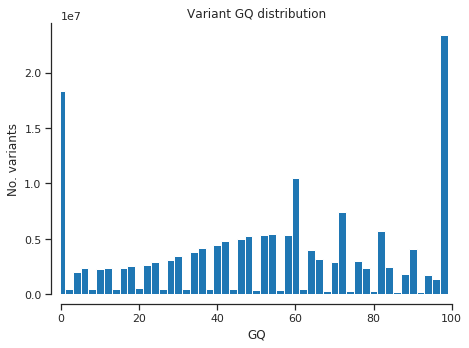

In [15]:
plot_variant_hist(callset['calldata/GQ'][:,:].flatten(), 'GQ', bins=50, xlim=100)

In [11]:
np.percentile(variants['FS'][:], 95)

75.27999877929688

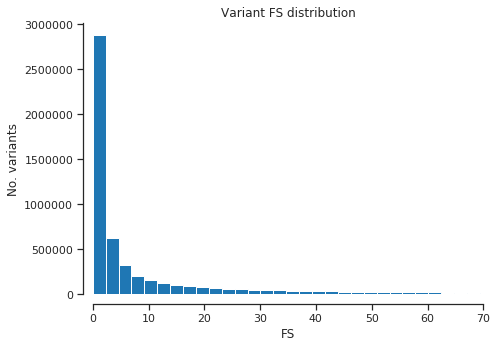

In [16]:
plot_variant_hist(variants['FS'][:], 'FS', bins=500, xlim=70)

In [44]:
MQ = variants['MQRankSum'][:]
cleanMQ = MQ[np.isfinite(MQ)]
np.percentile(cleanMQ, 5)

-4.25600004196167

/home/morrellp/wyant008/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/morrellp/wyant008/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


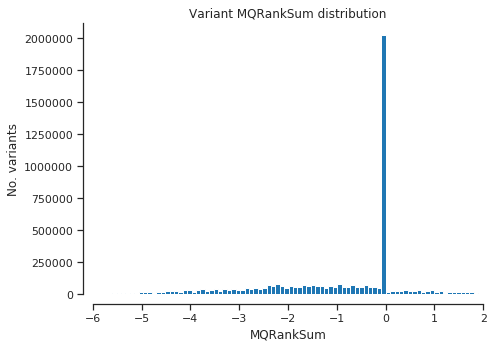

In [29]:
plot_variant_hist(variants['MQRankSum'][:], 'MQRankSum', bins=500, xlim=2, neglim=-6)

In [45]:
RP = variants['ReadPosRankSum'][:]
cleanRP = RP[np.isfinite(RP)]
np.percentile(cleanRP, 10)

-0.9670000076293945

/home/morrellp/wyant008/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/morrellp/wyant008/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


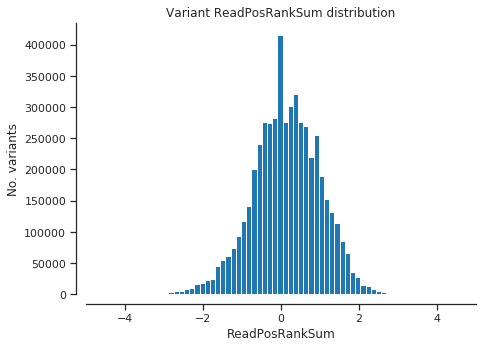

In [23]:
plot_variant_hist(variants['ReadPosRankSum'][:], 'ReadPosRankSum', bins=500, xlim=5, neglim=-5)

In [ ]:
%%bash
jupyter nbconvert  --to=html 'FN30_Exploration.ipynb'